# Rejection Sampling

# Rejection sampling - Uniform distribution

##### Goal
$$
\mbox{Generate a sample $X$, which is uniform on a bounded domain $D\subset\prod_{i=1}^d[a_i,b_i]$}
$$

##### Rejection sampling - Uniform distribution

$\quad$
[Step 1] Generate a random sample $U$ from $\prod_{i=1}^d[a_i,b_i]$.

$\quad$
[Step 2] If $U\notin D$, reject  and return to [Step 1]. Otherwise, let $X=U$.

/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


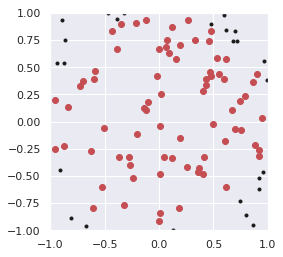

In [2]:
# uniform on unit circle x^2 + y^2 \le 1

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

n = 100
x = np.random.uniform(-1., 1., (n, 2))
plt.plot(x[:,0], x[:,1], '.k')

idx = []
for i in range(n):
    if np.sum(x[i]**2) <= 1:
        idx.append(i)
        
sample = x[idx]
plt.plot(sample[:,0], sample[:,1], 'or')
plt.xlim([-1., 1.])
plt.ylim([-1., 1.])
plt.axes().set_aspect('equal')
plt.show()

# Rejection sampling - Non-uniform distribution

##### Goal
$$
\mbox{Generate a sample $X$ with PDF $f(x)$}
$$

##### Background info
\begin{eqnarray}
(1)&&\mbox{Know $\tilde f(x)$ not $f(x)$, where}\ f(x)=\tilde f(x)/Z_f\nonumber\\
(2)&&\mbox{Can generate a sample $Y$ from $q(x)$}\nonumber\\
(3)&&\mbox{There is a constant $c$ with $cq(x)\ge \tilde f(x)$}\nonumber
\end{eqnarray}

##### Rejection sampling - Non-uniform distribution

$\quad$
[Step 1] Generate a random sample $Y$ from $q(x)$.

$\quad$
[Step 2] Generate a random sample $U$ from $U(0,cq(Y))$. If $U>\tilde f(x)$, reject  and return to [Step 1]. Otherwise, let $X=Y$.

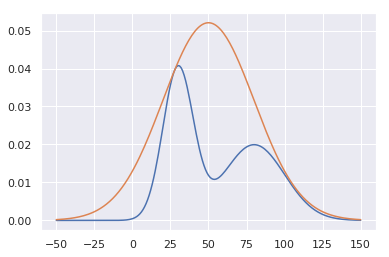

/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(51067,)


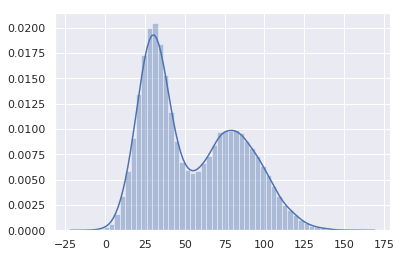

In [4]:
# https://wiseodd.github.io/techblog/2015/10/21/rejection-sampling/

import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


# The target distribution that I want to sample here is a mixture of Gaussian: 
# N(30, 10) + N(80, 20). 
# Take a note that this distribution is not normalized. Here’s what it looks like.
def tilde_f(x):
    return st.norm.pdf(x, loc=30, scale=10) + st.norm.pdf(x, loc=80, scale=20)


def q(x):
    return st.norm.pdf(x, loc=50, scale=30)


x = np.arange(-50, 151)

# cq(x)\ge \tilde f(x)
c = max(tilde_f(x) / q(x))


def rejection_sampling(iter=1000):
    samples = []

    for i in range(iter):
        z = np.random.normal(50, 30) # samples from q
        u = np.random.uniform(0, c*q(z)) 

        if u <= tilde_f(z): # accept
            samples.append(z)
        # else ---> reject

    return np.array(samples)


if __name__ == '__main__':
    plt.plot(x, tilde_f(x))
    plt.plot(x, c*q(x))
    plt.show()

    s = rejection_sampling(iter=100000)
    sns.distplot(s)
    print(s.shape)